In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import squarify
import seaborn as sns
import string
import warnings
import os
import re
from jqi_functions import *
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
data = pd.read_csv('high_wage_outputs_v2_COL.csv')

In [3]:
county_info = pd.read_csv('data/county_to_regions_key - Sheet1.csv')

In [4]:
cost_of_living = pd.read_csv('data/united-way-col-1A1PS1C2019.csv') # 1 adult, 1 preschooler, 1 child

In [5]:
data = pd.merge(data, county_info, on='County')

In [6]:
data = data[['Industry', 'Date', 'County', 'CDI Regions', 'Rural/Urban', 'Population', 'High Wage Count', 'Cost of Living']]

In [7]:
data['Population'] = normalize_titles(data['Population']).astype(int)

In [8]:
data.head()

,Industry,Date,County,CDI Regions,Rural/Urban,Population,High Wage Count,Cost of Living
0,accounting tax preparation bookkeeping and pay...,2019-01-01,Los Angeles,Los Angeles,Urban,10081570,8490,80216
1,accounting tax preparation bookkeeping and pay...,2019-01-01,Los Angeles,Los Angeles,Urban,10081570,8490,80216
2,accounting tax preparation bookkeeping and pay...,2019-02-01,Los Angeles,Los Angeles,Urban,10081570,9359,80216
3,accounting tax preparation bookkeeping and pay...,2019-02-01,Los Angeles,Los Angeles,Urban,10081570,9359,80216
4,accounting tax preparation bookkeeping and pay...,2019-03-01,Los Angeles,Los Angeles,Urban,10081570,9517,80216


### Histogram of wages by industry

In [16]:
ca_ipums = cleaned_ipums('2019')

In [84]:
ca_ipums_wages = ca_ipums.groupby(by=['Main_Code']).mean()

In [234]:
ca_ipums_wages_regions = pd.merge(ca_ipums, county_info, on='COUNTYFIP').groupby(by=['CDI Regions']).mean()

In [89]:
ca_ipums_minelog = ca_ipums.loc[ca_ipums['Main_Code'] == 100]
ca_ipums_farm = ca_ipums.loc[ca_ipums['Main_Code'] == 111]
ca_ipums_const = ca_ipums.loc[ca_ipums['Main_Code'] == 230]
ca_ipums_manu = ca_ipums.loc[ca_ipums['Main_Code'] == 300]
ca_ipums_ttu = ca_ipums.loc[ca_ipums['Main_Code'] == 400]
ca_ipums_info = ca_ipums.loc[ca_ipums['Main_Code'] == 500]
ca_ipums_fin = ca_ipums.loc[ca_ipums['Main_Code'] == 520]
ca_ipums_prof = ca_ipums.loc[ca_ipums['Main_Code'] == 540]
ca_ipums_eduhealth = ca_ipums.loc[ca_ipums['Main_Code'] == 600]
ca_ipums_leisure = ca_ipums.loc[ca_ipums['Main_Code'] == 700]
ca_ipums_other = ca_ipums.loc[ca_ipums['Main_Code'] == 800]
ca_ipums_gov = ca_ipums.loc[ca_ipums['Main_Code'] == 900]

In [90]:
main_ind_dfs = [ca_ipums_minelog, ca_ipums_farm, ca_ipums_const, ca_ipums_manu, ca_ipums_ttu, ca_ipums_info, ca_ipums_fin, ca_ipums_prof, ca_ipums_eduhealth, ca_ipums_leisure, ca_ipums_other, ca_ipums_gov]

In [108]:
main_ind_titles = ['Mining & Logging', 'Total Farm', 'Construction', 'Manufacturing', 'Trade, Transportation, & Utilities', 'Information', 'Financial Activities', 'Professional & Business Services', 'Educational & Health Services', 'Leisure & Hospitality', 'Other Services', 'Government']

In [127]:
def plot_hist(df_lists, titles):
    fig, ax = plt.subplots(6, 2, figsize=(24,30))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
    n_col = 0
    n_row = 0
    for i in range(len(df_lists)):
        ax[n_row, n_col].hist(df_lists[i]['INCWAGE'], bins=50, color='#5797c2')
        ax[n_row, n_col].set_title(titles[i], fontsize=14, weight='bold', pad=20, color='#545454')
        ax[n_row, n_col].set_xlabel('Average Wage Per Industry', fontsize=12, weight='bold', color = '#545454')
        ax[n_row, n_col].xaxis.set_label_coords(0.15, -0.12)
        ax[n_row, n_col].spines['top'].set_visible(False)
        ax[n_row, n_col].spines['right'].set_visible(False)
        ax[n_row, n_col].spines['bottom'].set_linewidth(0.5)
        ax[n_row, n_col].spines['left'].set_linewidth(0.5)
        n_col += 1
        if n_col == 2:
            n_col = 0
            n_row += 1
    plt.show()

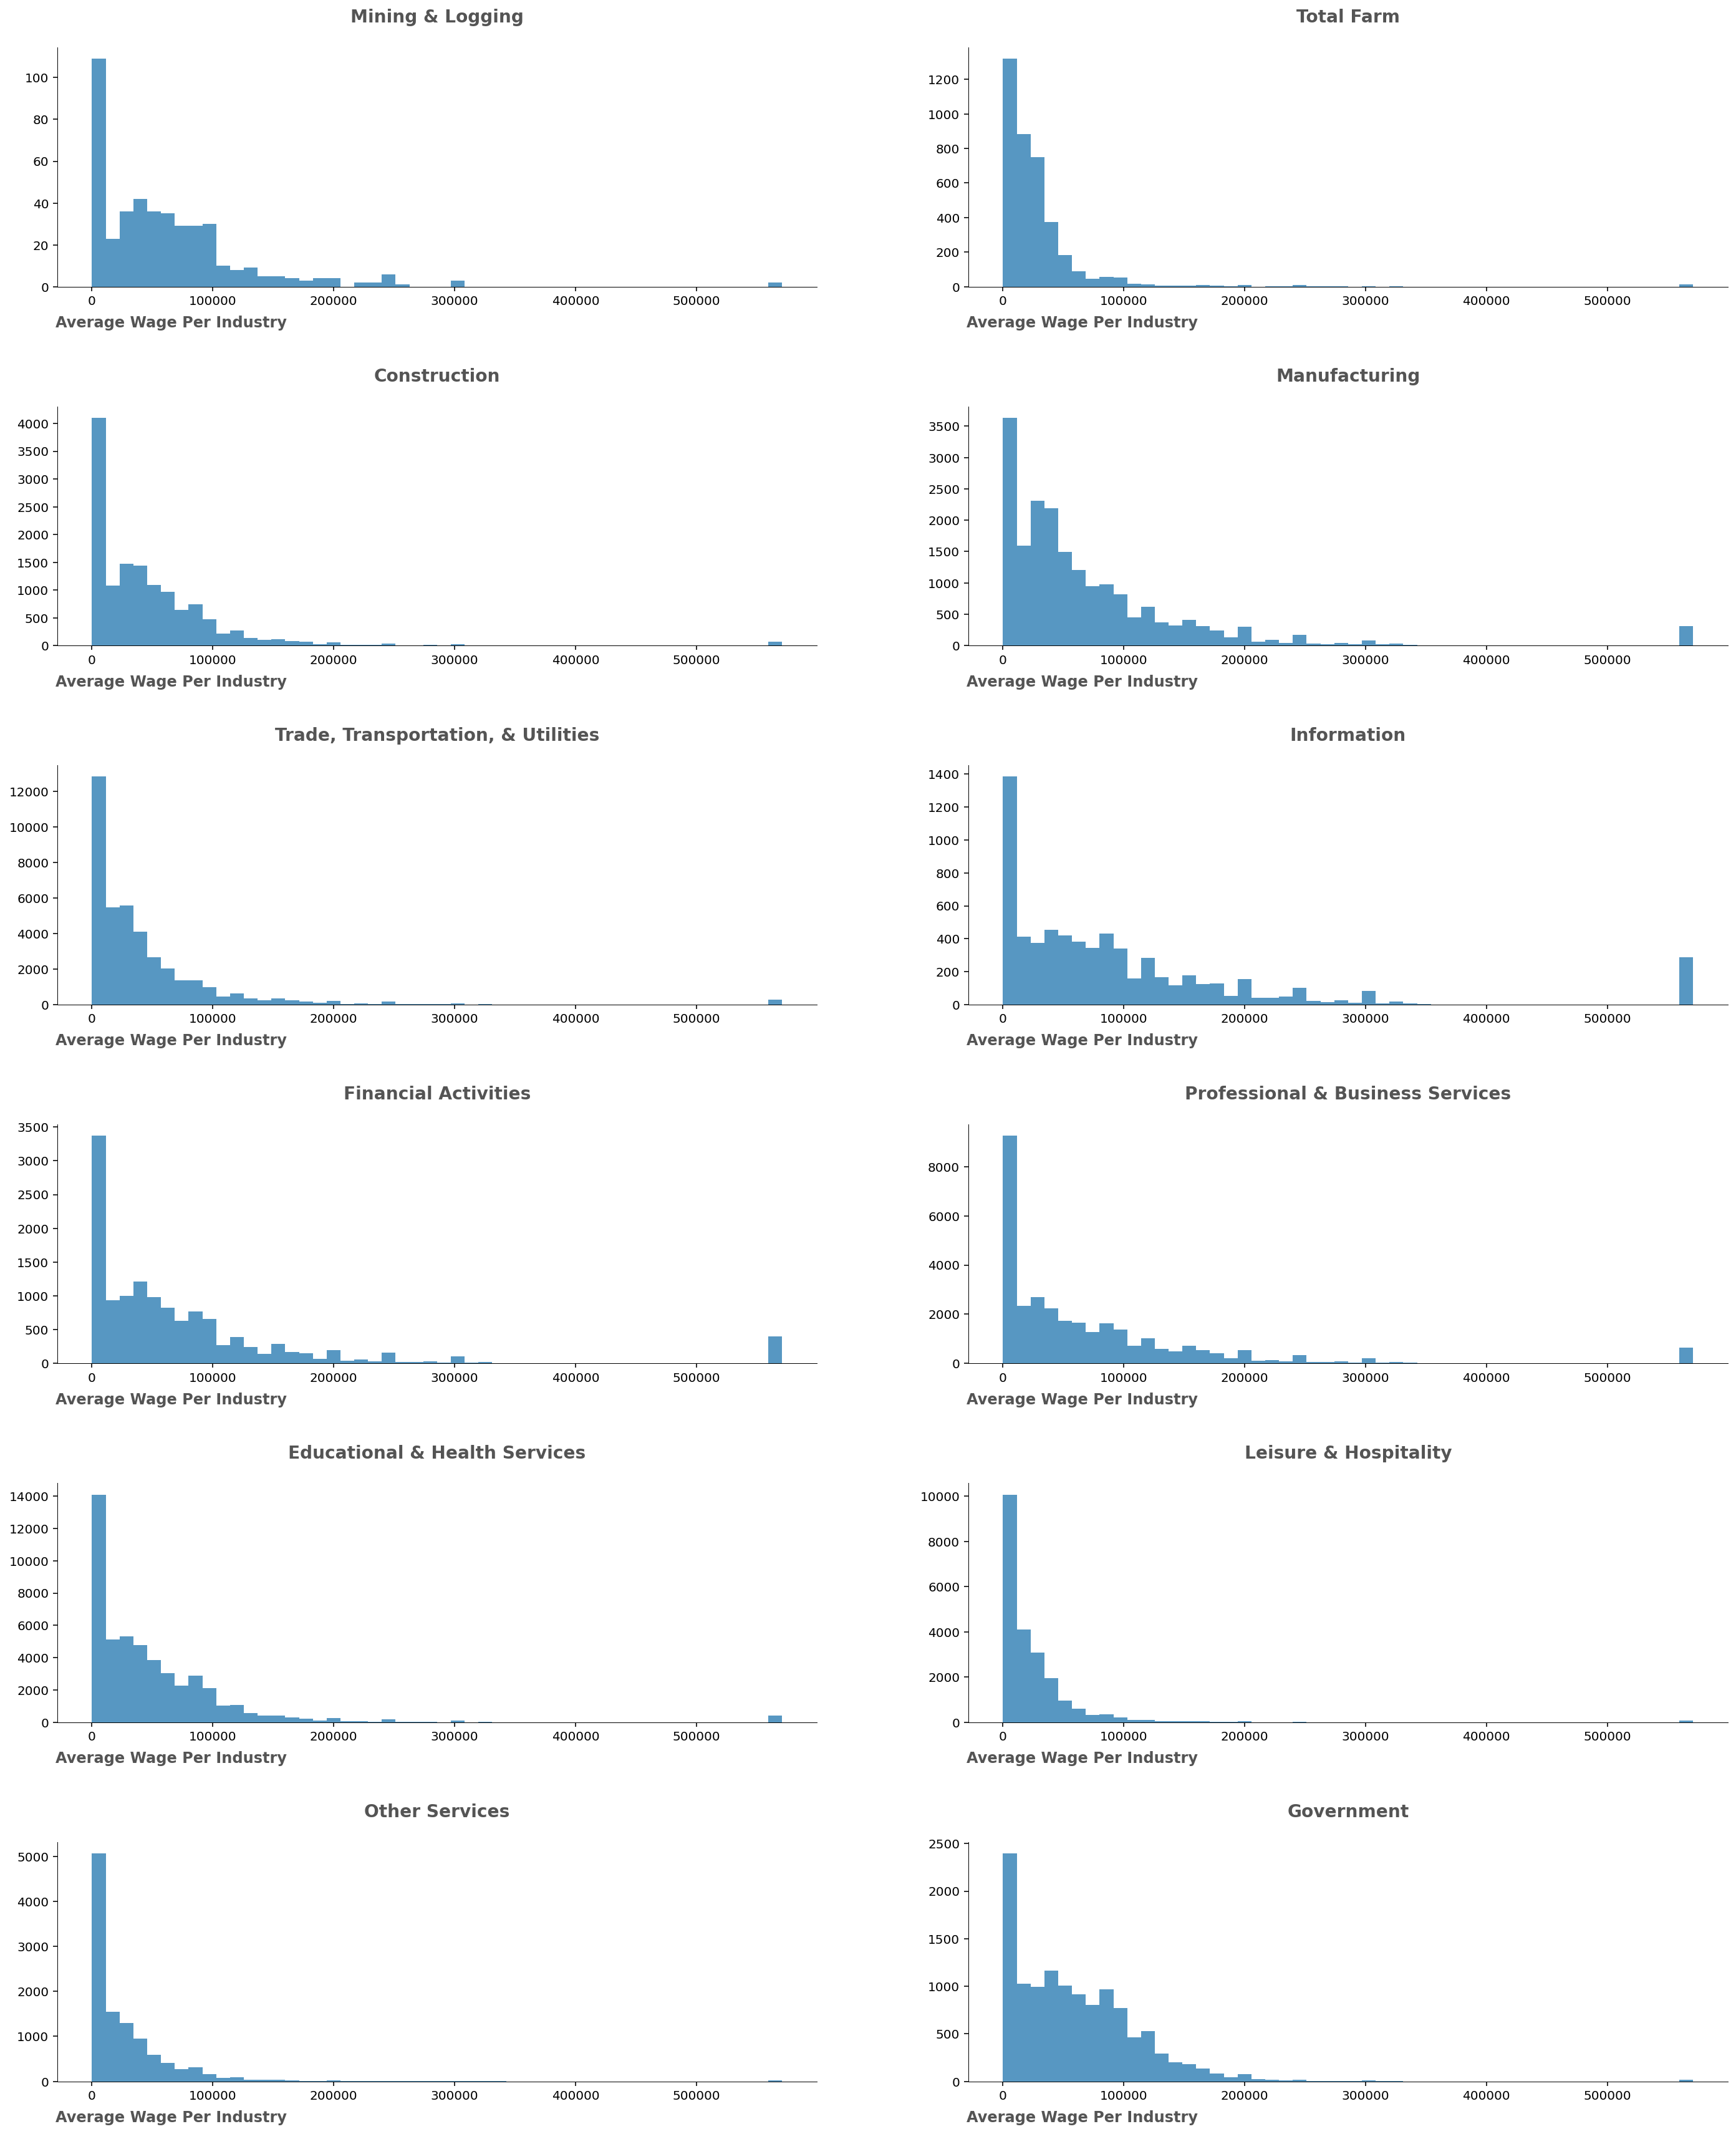

In [128]:
plot_hist(main_ind_dfs, main_ind_titles)

In [235]:
ca_ipums_wages_regions

,YEAR,STATEFIP,COUNTYFIP,PERWT,INCWAGE,Main_Code,Sub_1_Code,FIPS
CDI Regions,,,,,,,,
Bay Area,2019.0,6.0,54.855936,100.432421,76507.867962,526.745862,540.851844,6054.855936
Central Coast,2019.0,6.0,95.910047,100.179638,48261.519123,528.456272,542.931711,6095.910047
Central Valley,2019.0,6.0,54.235515,116.062959,37303.261924,502.699889,517.811176,6054.235515
Inland Empire,2019.0,6.0,67.716895,113.041597,40120.138658,531.357999,547.613776,6067.716895
Los Angeles,2019.0,6.0,37.000000,97.005528,47186.350577,534.929930,550.429686,6037.000000
Orange,2019.0,6.0,59.000000,102.246310,54661.497043,524.712238,539.934147,6059.000000
Redwood Coast,2019.0,6.0,23.000000,97.873108,28449.580908,541.639115,555.940629,6023.000000
Sacramento,2019.0,6.0,66.182583,101.892399,49713.516605,552.266125,566.946716,6066.182583
San Diego-Imperial,2019.0,6.0,71.377673,112.827983,50297.842627,553.723935,568.362551,6071.377673


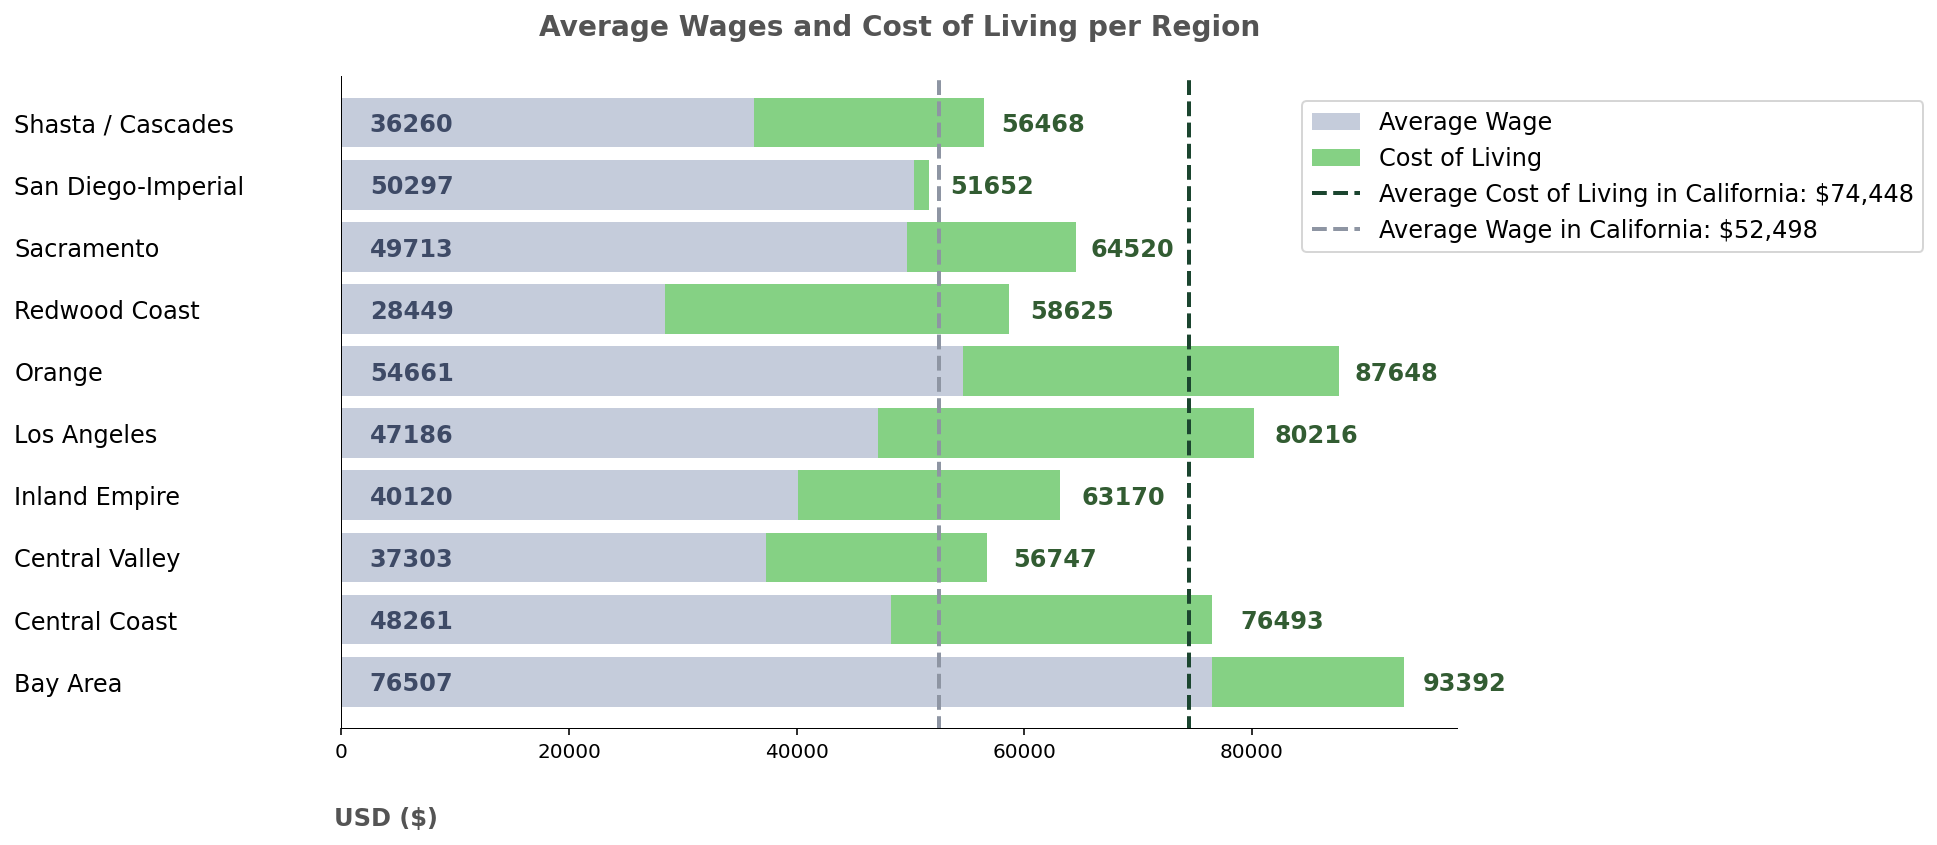

In [260]:
fig, ax = plt.subplots(figsize=(10,6))

bar1 = ax.barh(np.arange(10), cost_of_living['Cost of Living'][0:10].values, color='#85d184', label="Cost of Living")
bar2 = ax.barh(np.arange(10), ca_ipums_wages_regions['INCWAGE'].values, color='#c5ccdb', label="Average Wage")

ax.set_yticks(np.arange(10))
ax.set_yticklabels(ca_ipums_wages_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

avg_wage = int(ca_ipums['INCWAGE'].mean())
ca_col = cost_of_living['Cost of Living'][11:12].values

ax.vlines(x=avg_wage, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average Wage in California: $52,498')
ax.vlines(x=ca_col, ymin=-0.8, ymax=10, 
          color='#1b452f', lw=2, ls='dashed', label='Average Cost of Living in California: $74,448')
ax.set_ylim(-0.75, 9.75)

ax.set_title('Average Wages and Cost of Living per Region', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(cost_of_living['Cost of Living'].values[0])}", (95000, -0.15), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[1])}", (79000, 0.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[2])}", (59000, 1.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[3])}", (65000, 2.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[4])}", (82000, 3.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[5])}", (89000, 4.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[6])}", (60500, 5.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[7])}", (65800, 6.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[8])}", (53500, 7.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[9])}", (58000, 8.85), size=12, weight='bold', color='#325c32', annotation_clip=False)

ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[0])}", (2500, -0.15), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[1])}", (2500, 0.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[2])}", (2500, 1.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[3])}", (2500, 2.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[4])}", (2500, 3.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[5])}", (2500, 4.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[6])}", (2500, 5.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[7])}", (2500, 6.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[8])}", (2500, 7.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[9])}", (2500, 8.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.85, 0.98), loc='upper left', fontsize=12)
plt.show()

### High wage count in CA over 2019

In [9]:
hw_state = data.groupby(by=["Date"]).sum()
hw_state

,Population,High Wage Count,Cost of Living
Date,,,
2019-01-01,3587675685,1953057,48984599
2019-02-01,3587675685,1965485,48984599
2019-03-01,3587675685,1964601,48984599
2019-04-01,3587675685,1972604,48984599
2019-05-01,3587675685,1976131,48984599
2019-06-01,3587675685,1980330,48984599
2019-07-01,3587675685,1973622,48984599
2019-08-01,3587675685,1977896,48984599
2019-09-01,3587675685,1981177,48984599


In [ ]:
# percentage as well

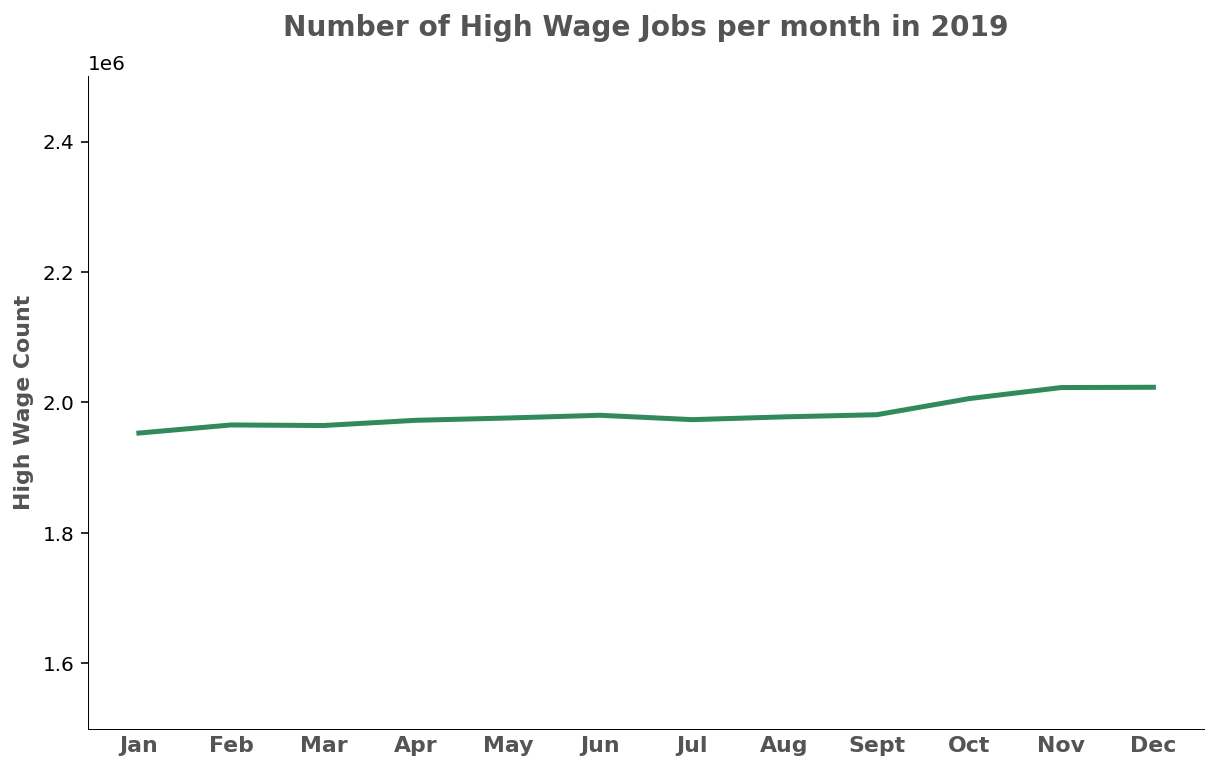

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per month in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(1.5e+6,2.5e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Industries with most and least high wage jobs in the state

In [11]:
hw_state_industry = data.groupby(by=["Industry"]).mean().sort_values(by='High Wage Count')
hw_state_industry_cut = hw_state_industry.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]
hw_state_industry_cut

,Population,High Wage Count,Cost of Living
Industry,,,
book stores and news dealers,10081570.0,0.000000,80216.0
nonferrous metal except aluminum production and processing,10081570.0,0.000000,80216.0
clothing stores,3316073.0,76.083333,79472.0
taxi and limousine service,10081570.0,216.750000,80216.0
retail bakeries,10081570.0,240.250000,80216.0
management scientific and technical consulting services,6624807.0,11617.541667,83932.0
architectural engineering and related services,5963060.2,12256.400000,83040.0
computer systems design and related services,6624807.0,13254.666667,83932.0
aerospace products and parts manufacturing,6698821.5,14731.375000,79844.0


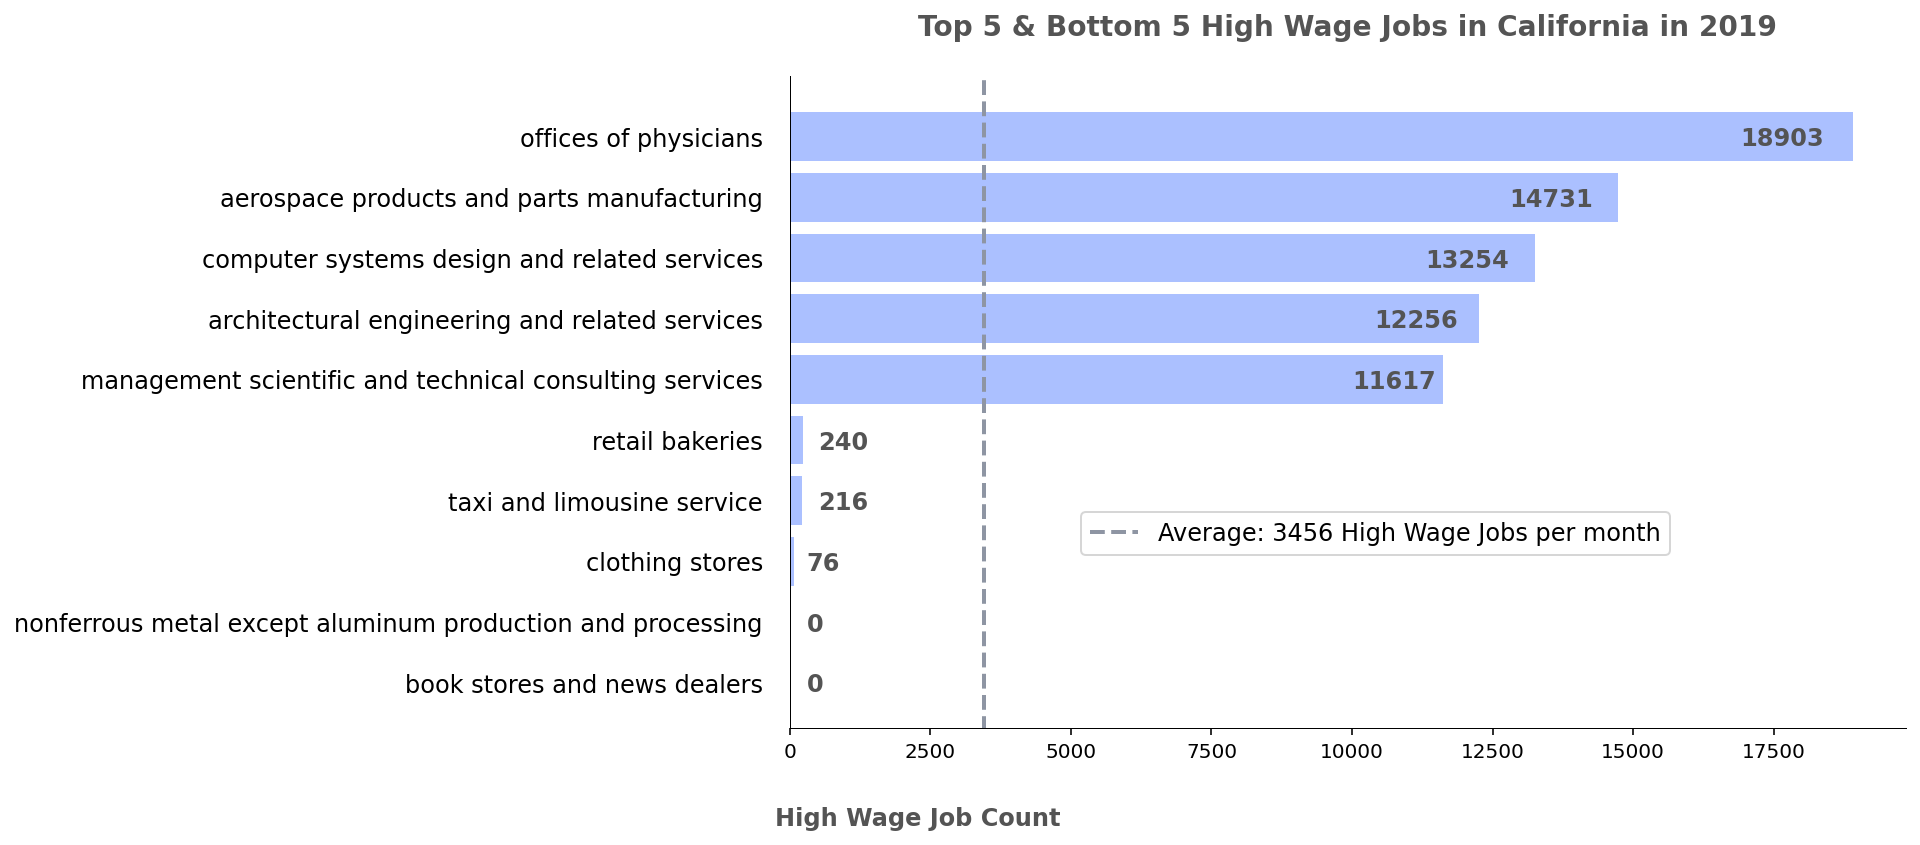

In [63]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_state_industry_cut['High Wage Count'].values, color='#abc0ff')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_state_industry_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_state_industry['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 High Wage Jobs in California in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate("0", (300, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("0", (300, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("76", (300, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("216", (500, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("240", (500, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("11617", (10000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("12256", (10400, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("13254", (11300, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("14731", (12800, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("18903", (16900, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.35), loc='upper left', fontsize=12)
plt.show()

### Average high wage count in 2019 per region

In [169]:
hw_regions = data.groupby(by=["CDI Regions", "Date"]).sum().groupby(by=['CDI Regions']).mean().sort_values(by='High Wage Count')
hw_regions

,Population,High Wage Count,Cost of Living
CDI Regions,,,
Redwood Coast,1.359400e+05,8.366667e+01,59608.0
Shasta / Cascades,4.050290e+05,7.615000e+02,117486.0
Inland Empire,1.368141e+07,7.401000e+03,378957.0
Central Coast,1.795851e+07,2.644650e+04,2748494.0
Sacramento,1.114447e+07,3.011483e+04,839252.0
Central Valley,3.886698e+07,4.072967e+04,3090514.0
Bay Area,2.960902e+07,1.036218e+05,3454456.0
San Diego-Imperial,1.858808e+08,1.787078e+05,4500568.0
Orange,3.865014e+08,4.920622e+05,10693056.0


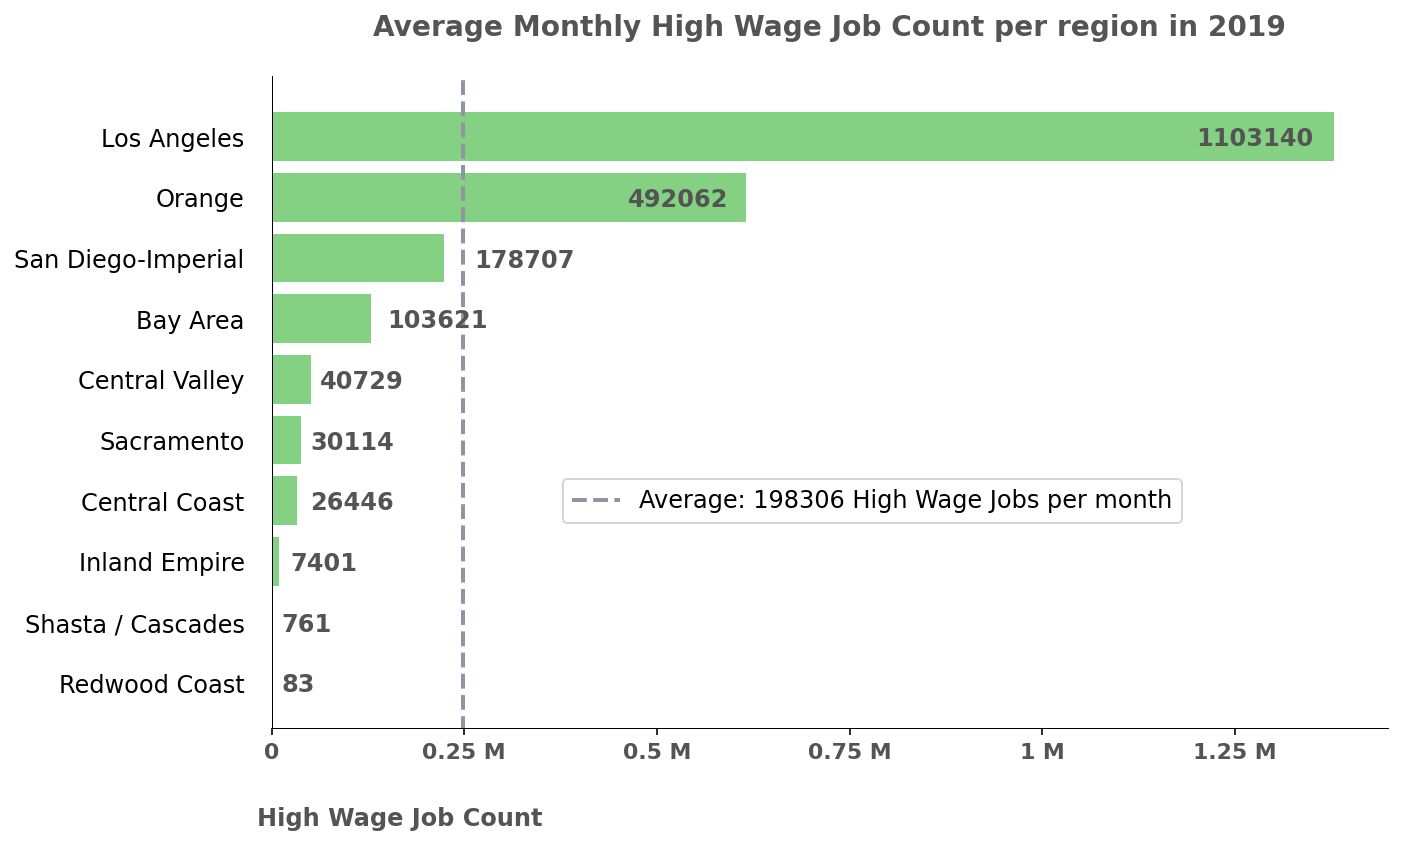

In [225]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_regions['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_regions.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_regions['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Average Monthly High Wage Job Count per region in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_regions['High Wage Count'].values[0])}", (10000, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[1])}", (10000, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[2])}", (20000, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[3])}", (40000, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[4])}", (40000, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[5])}", (50000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[6])}", (120000, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[7])}", (210000, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[8])}", (370000, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[9])}", (960000, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.4), loc='upper left', fontsize=12)
plt.show()

In [226]:
shasta_data = data.loc[data['CDI Regions'] == 'Shasta / Cascades']
cv_data = data.loc[data['CDI Regions'] == 'Central Valley']
rc_data = data.loc[data['CDI Regions'] == 'Redwood Coast']
sd_data = data.loc[data['CDI Regions'] == 'San Diego-Imperial']
orange_data = data.loc[data['CDI Regions'] == 'Orange']
ie_data = data.loc[data['CDI Regions'] == 'Inland Empire']
cc_data = data.loc[data['CDI Regions'] == 'Central Coast']
bay_data = data.loc[data['CDI Regions'] == 'Bay Area']
sac_data = data.loc[data['CDI Regions'] == 'Sacramento']
la_data = data.loc[data['CDI Regions'] == 'Los Angeles']

In [227]:
hw_shasta = shasta_data.groupby(by=["Date"]).sum()
hw_cv = cv_data.groupby(by=["Date"]).sum()
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_la = la_data.groupby(by=["Date"]).sum()

In [229]:
hw_bay #4.7m ppl

,Population,High Wage Count,Cost of Living
Date,,,
2019-01-01,29609022,103368,3454456
2019-02-01,29609022,103686,3454456
2019-03-01,29609022,103952,3454456
2019-04-01,29609022,103461,3454456
2019-05-01,29609022,103782,3454456
2019-06-01,29609022,104821,3454456
2019-07-01,29609022,104003,3454456
2019-08-01,29609022,104391,3454456
2019-09-01,29609022,103450,3454456


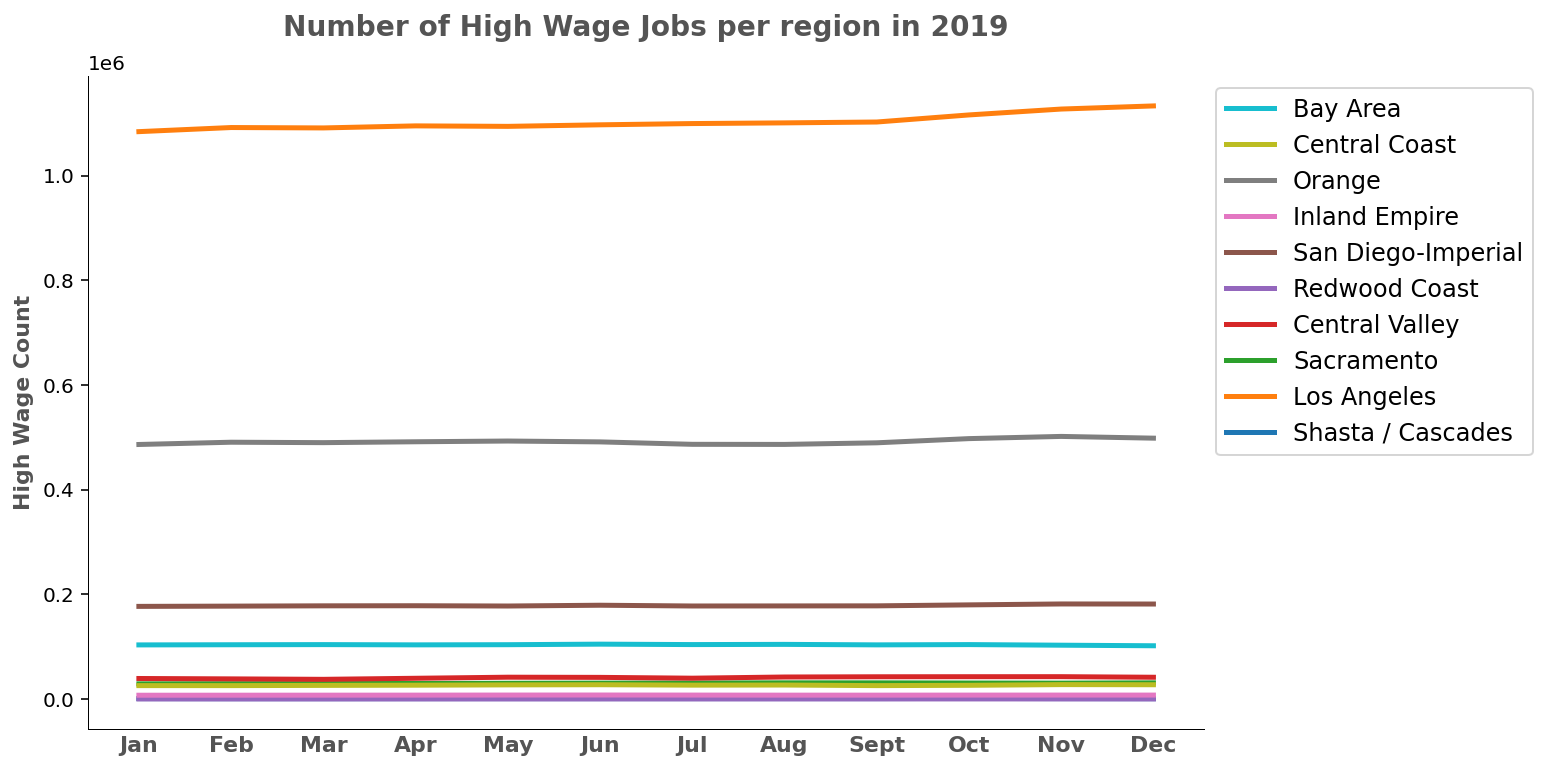

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_shasta['High Wage Count'].values, lw=2.5, label='Shasta / Cascades')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_cv['High Wage Count'].values, lw=2.5, label='Central Valley')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per region in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

### Average high wage count between rural and urban locations

In [164]:
hw_rural_urban = data.groupby(by=["Rural/Urban", "Date"]).sum().groupby(by=['Rural/Urban']).mean().sort_values(by='High Wage Count')
hw_rural_urban

,Population,High Wage Count,Cost of Living
Rural/Urban,,,
Rural,1.479412e+07,3.184692e+04,3022191.0
Urban,3.572882e+09,1.951222e+06,45962408.0


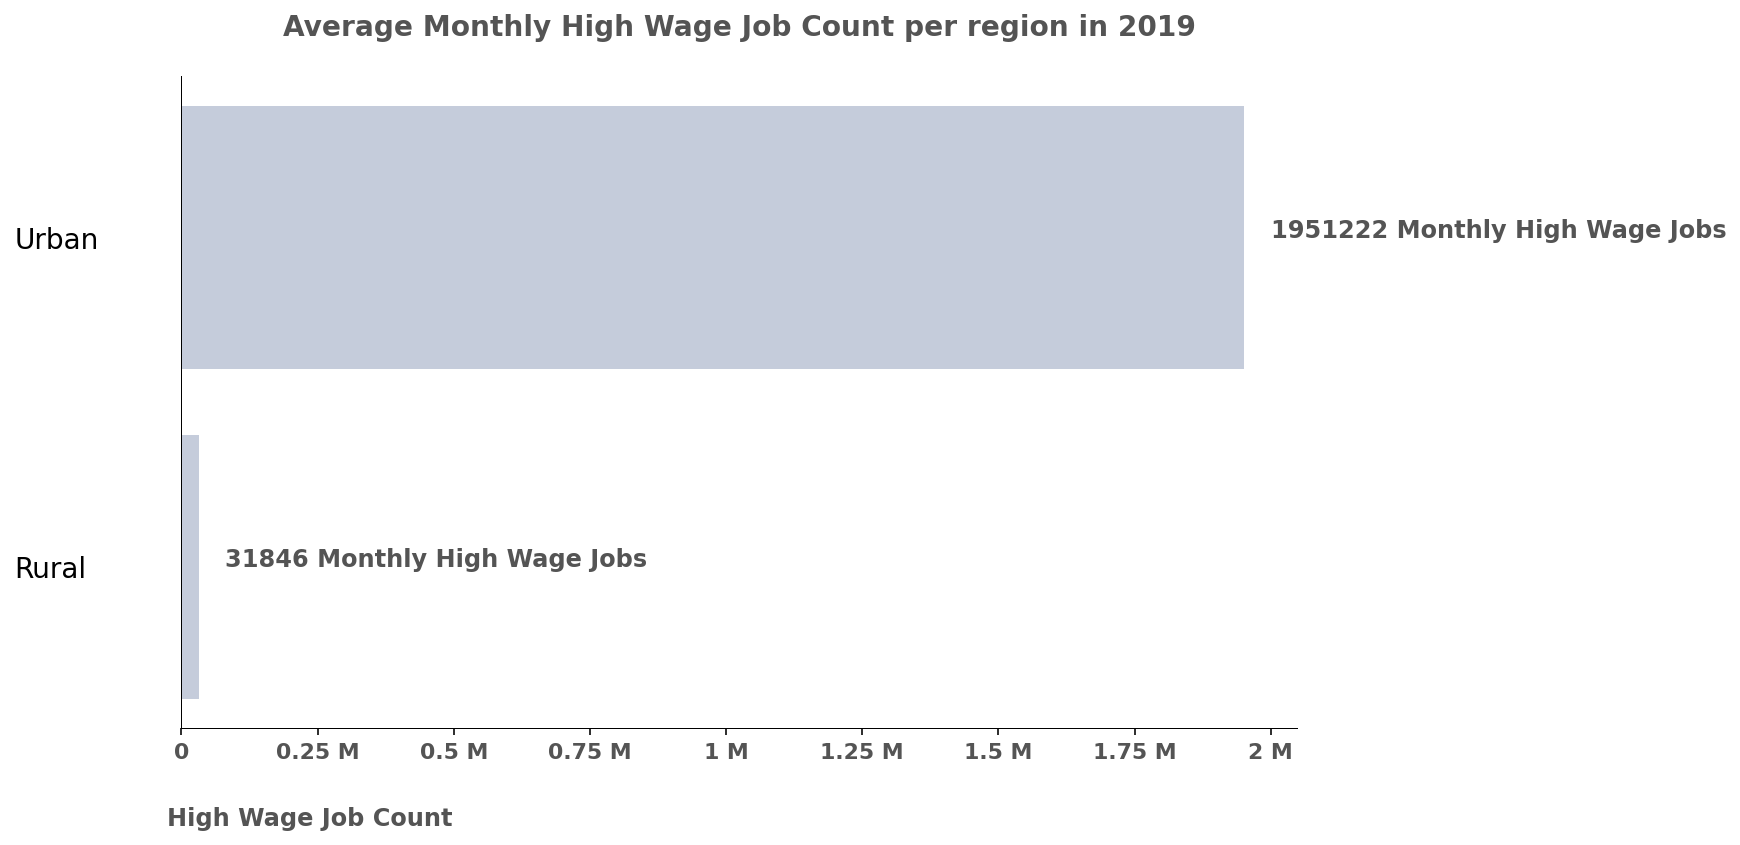

In [165]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(2), hw_rural_urban['High Wage Count'].values, color='#c5ccdb')

ax.set_yticks(np.arange(2))
ax.set_yticklabels(hw_rural_urban.index, fontsize = 14, ha='left')
ax.tick_params(axis='y',direction='out', pad=80, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M','2 M'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.annotate(f"{int(hw_rural_urban['High Wage Count'].values[1])} Monthly High Wage Jobs", (2000000, 1), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_rural_urban['High Wage Count'].values[0])} Monthly High Wage Jobs", (80000, 0), size=12, weight='bold', color='#545454', annotation_clip=False)
weight='bold', 
ax.set_title('Average Monthly High Wage Job Count per region in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Tree Plot

In [278]:
hw_regions

,Population,High Wage Count,Cost of Living
CDI Regions,,,
Redwood Coast,1.359400e+05,8.366667e+01,59608.0
Shasta / Cascades,4.050290e+05,7.615000e+02,117486.0
Inland Empire,1.368141e+07,7.401000e+03,378957.0
Central Coast,1.795851e+07,2.644650e+04,2748494.0
Sacramento,1.114447e+07,3.011483e+04,839252.0
Central Valley,3.886698e+07,4.072967e+04,3090514.0
Bay Area,2.960902e+07,1.036218e+05,3454456.0
San Diego-Imperial,1.858808e+08,1.787078e+05,4500568.0
Orange,3.865014e+08,4.920622e+05,10693056.0


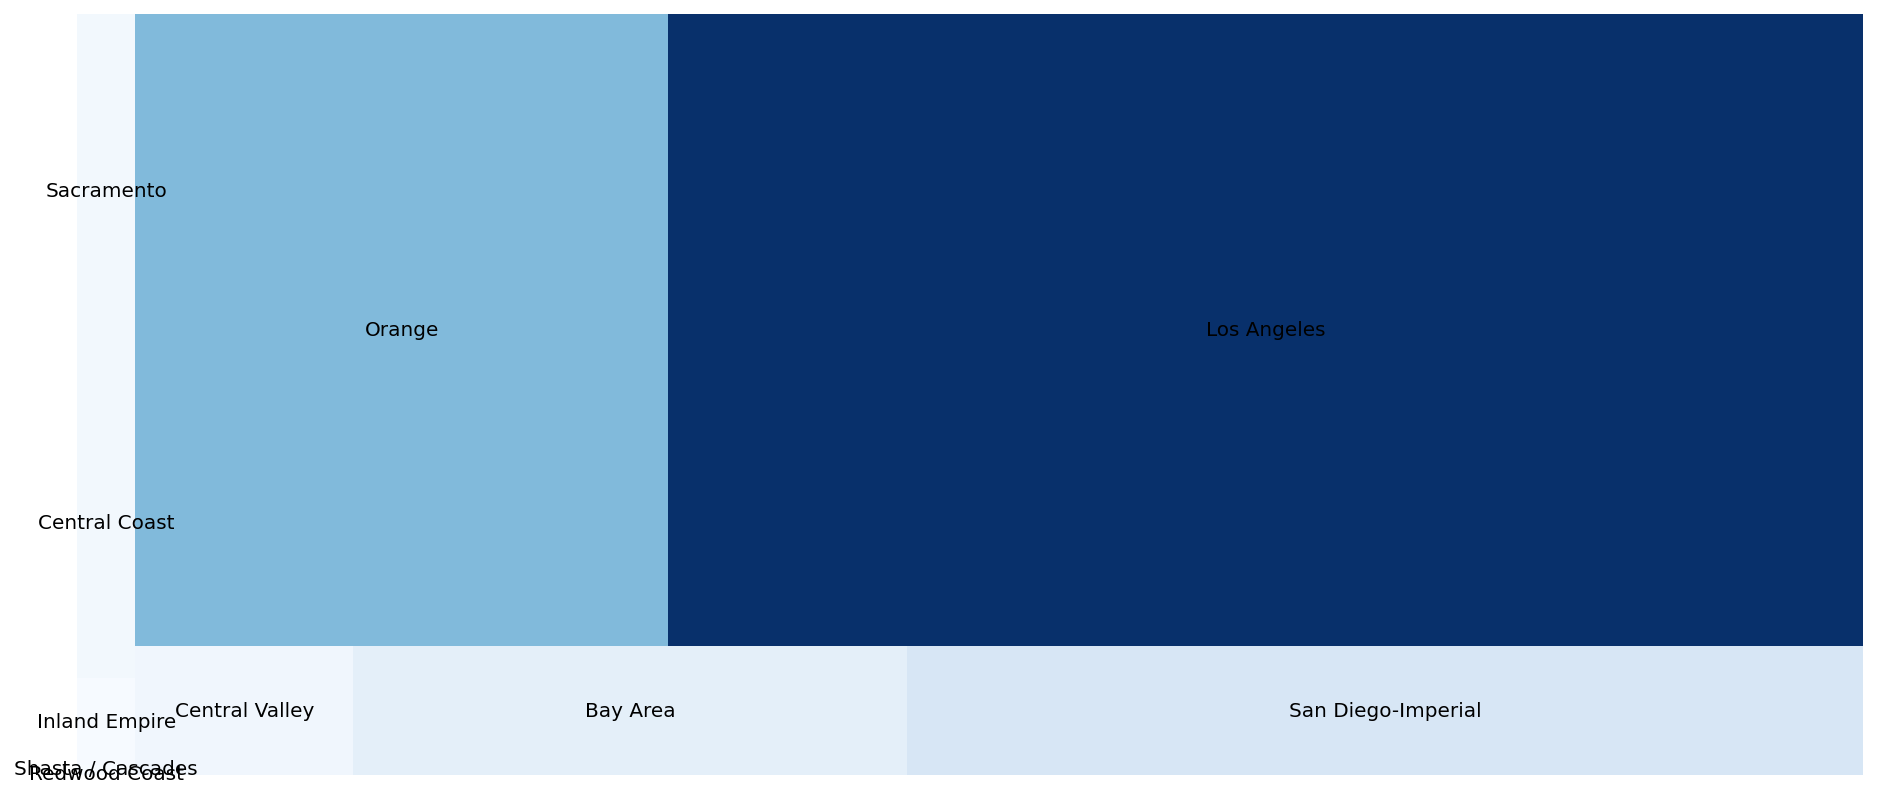

In [277]:
fig, ax = plt.subplots(figsize=(16,7))

labels = hw_regions.index.values
sizes = hw_regions['High Wage Count'].values
norm = matplotlib.colors.Normalize(vmin=min(hw_regions['High Wage Count']), vmax=max(hw_regions['High Wage Count']))
colors = [matplotlib.cm.Blues(norm(value)) for value in hw_regions['High Wage Count']]
squarify.plot(sizes, color = colors, label = labels)
plt.axis('off')

plt.show()

### Top 5 & Bottom 5 Counties by number of high wage jobs

In [279]:
hw_county = data.groupby(by=["County", 'Date']).sum().groupby(by=['County']).mean().sort_values(by='High Wage Count')
hw_county_cut = hw_county.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]

In [280]:
hw_county_cut

,Population,High Wage Count,Cost of Living
County,,,
Imperial,1.807010e+05,0.000000e+00,50136.0
Marin,2.599430e+05,1.350000e+01,114139.0
El Dorado,1.885630e+05,2.033333e+01,65348.0
Kings,1.506910e+05,3.166667e+01,56569.0
Humboldt,1.359400e+05,8.366667e+01,59608.0
San Francisco,2.624883e+06,2.491442e+04,344424.0
Sacramento,9.147318e+06,2.582467e+04,382938.0
San Diego,1.857001e+08,1.787078e+05,4450432.0
Orange,3.865014e+08,4.920622e+05,10693056.0


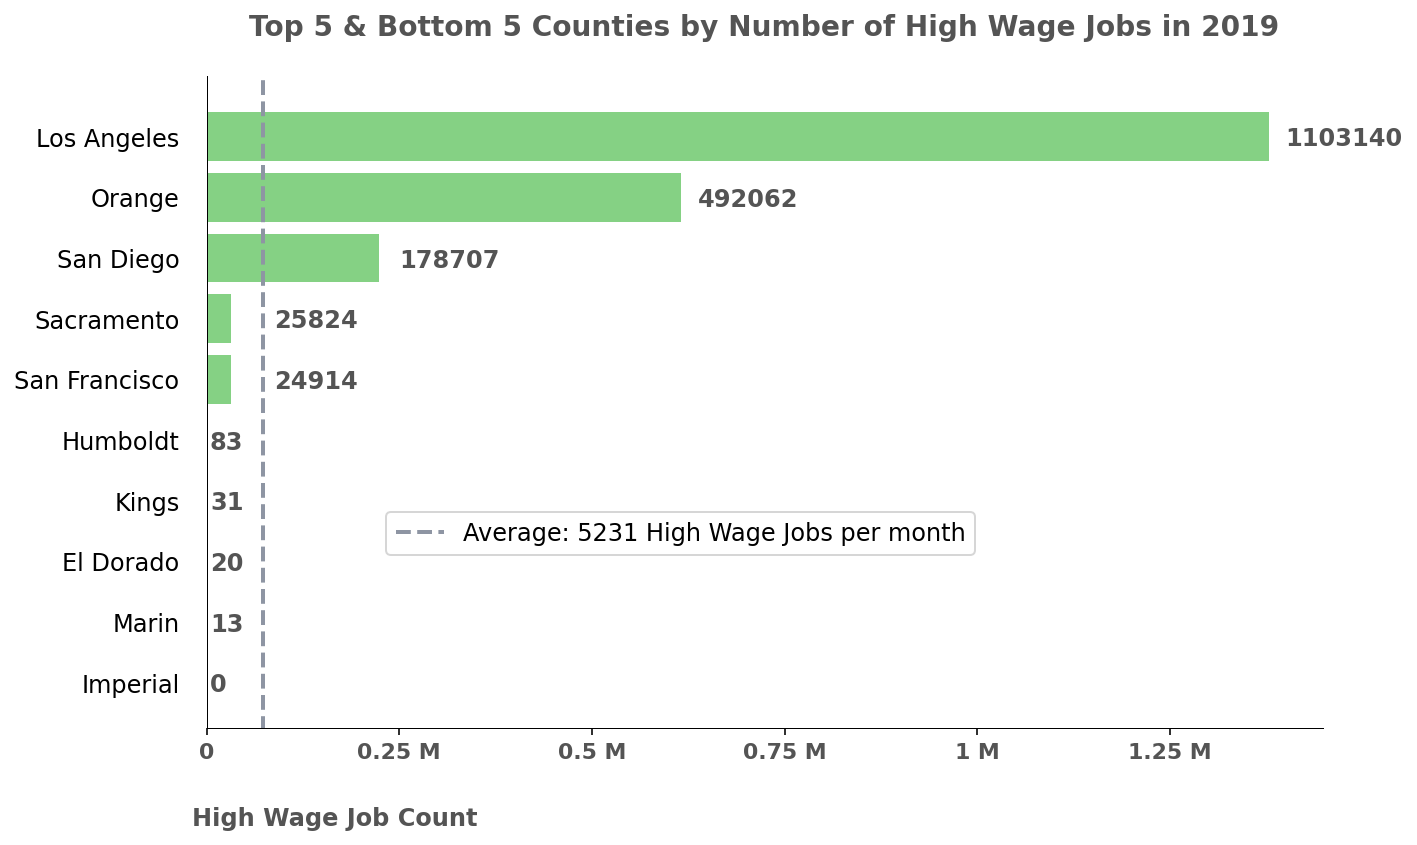

In [223]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_county_cut['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_county_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)
ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M','2 M'], 
                   fontsize=11, weight='bold', color = '#545454')

ax.vlines(x=hw_county['High Wage Count'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label='Average: 5231 High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 Counties by Number of High Wage Jobs in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[0])}", (3500, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[1])}", (3500, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[2])}", (3500, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[3])}", (3500, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[4])}", (3500, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[5])}", (70000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[6])}", (70000, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[7])}", (200000, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[8])}", (510000, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[9])}", (1120000, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.15, 0.35), loc='upper left', fontsize=12)
plt.show()